In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('files/train.csv')

## The PassengerId is directly related to the index..

In [3]:
all(train.index == train.PassengerId - 1)

True

# Looking at the data...

## Any missing values?

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Age has missing values. Let's look at it. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

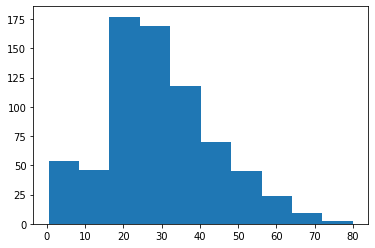

In [5]:
plt.hist(train['Age'])

## The data here is vaguely Gaussian. The choice of the median or mean in this case would offer the 'most common' age, which can be an appropriate choice to fill the missing values. However, it's not a painfully realistic assumption to assume that the missing passenger ages are all the same, so what I'll do instead is give them ages from a normal distribution centered on the 'most common' age. The aim here is to populate the missing values in such a way that the histogram above doesn't change its shape, but only increases slightly in resolution by the introduction of more datapoints.

In [6]:
med = np.nanmedian(train['Age'])
mean = np.nanmean(train['Age'])

In [7]:
nans = train[train.Age.isna()]
nans

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## I see a lot of Pclass = 3. Is the data missing at random?

(array([ 30.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0., 136.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

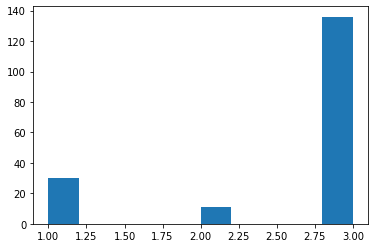

In [8]:
plt.hist(nans['Pclass'])

## It seems the data isn't missing at random, and instead the vast majority of missing ages belong to people with ticket class 3. Since the data isn't missing at random, adding 'fake' ages is probably not worth the effort, as I'd need to make sure the ages I sample from are particularly justified for ticket class 3 peoples' ages, and that would be a smaller subset of values to try and approximate to a normal distribution. It's probably not worth the hassle. 

<AxesSubplot:ylabel='Frequency'>

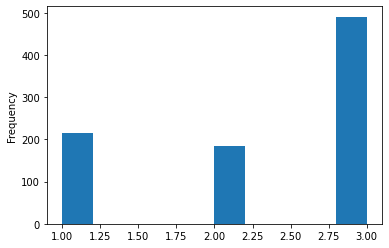

In [9]:
train['Pclass'].plot.hist()

## It seems the most common ticket class is ticket class 3. So, removing some rows with that as the most common ticket class should still keep it well-represented.

In [10]:
train = train.dropna(subset = ['Age'])
train = train.reset_index(drop = True)

# Let's look at the data now a little bit.

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [12]:
train['PassengerId'] = range(1,len(train.index)+1)
train['Died'] = 1 - train['Survived']

In [13]:
for cols in train.columns:
    print('There are ', len(set(train[cols])), 'unique values for column ', cols)

There are  714 unique values for column  PassengerId
There are  2 unique values for column  Survived
There are  3 unique values for column  Pclass
There are  714 unique values for column  Name
There are  2 unique values for column  Sex
There are  88 unique values for column  Age
There are  6 unique values for column  SibSp
There are  7 unique values for column  Parch
There are  542 unique values for column  Ticket
There are  220 unique values for column  Fare
There are  135 unique values for column  Cabin
There are  4 unique values for column  Embarked
There are  2 unique values for column  Died


# Let's look at the columns without too many unique values, which are likely to be categorical.

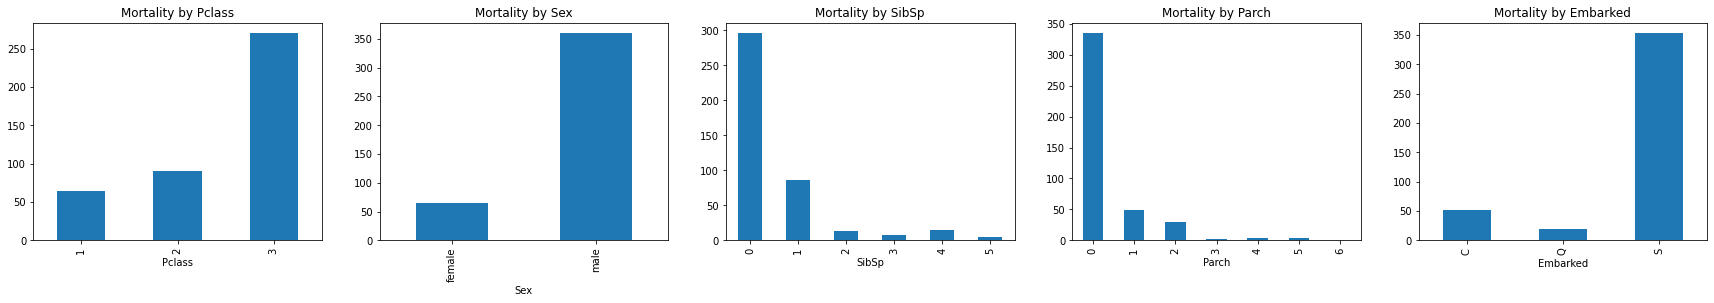

In [14]:
fig, axs = plt.subplots(ncols=5, figsize=(30, 4))
i = 0
for col in ['Pclass','Sex','SibSp','Parch','Embarked']:
    train.groupby(col).sum()['Died'].plot(kind = 'bar', ax = axs[i])
    axs[i].set_title('Mortality by '+col)
    i += 1

## Looking at the plots..
- Clearly ticket class 3 had the most deaths.
- Males died far more often than females.
- People with no siblings or spouses on board were most likely to die. 
- People with no parents or children aboard were most likely to die.
- People who had Southamptom as a port of embarkation were most likely to die.

In [15]:
train['Family members'] = train['Parch'] + train['SibSp']

<AxesSubplot:xlabel='Family members'>

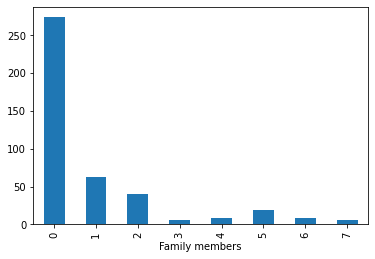

In [16]:
train.groupby('Family members').sum()['Died'].plot(kind = 'bar')

## So, generally speaking, having family members on board seemed to greatly increase a passenger's chance of survival.

# Now, let's work on cleaning the data up, row-by-row.
- Just by looking at its values, Pclass and Embarked should be one-hot encoded.
- It may be worth looking at the titles of passengers, as they're given, and seeing if they could be useful. 
- Using Ticket and Cabin will require a bit of clever thinking to use them properly. We don't have a lot of rows, so one-hot encoding can't be abused too much or our number of dimensions will get too close to our number of datapoints.
- Rows like Age and SibSp and Parch are numerical types of data. Will want to normalize them in some way. Could maybe one-hot encode Age into age groups.

# Processing names
## I found a list of honorifics online. I made some functions to clean the names up and test to see if I'm missing any. Any functions I have can be found in the `data_preprocessing` folder.

In [17]:
honorifics = [
  'Mr',
  'Ms',
  'Miss',
  'Mrs',
  'Mx',
  'Master',
  'Sir',
  'Madam',
  'Dame',
  'Lord',
  'Lady',
  'Dr',
  'Prof',
  'Br',
  'Sr',
  'Fr',
  'Rev',
  'Pr',
  'Elder',
]

In [18]:
from data_preprocessing.process_names import *

In [19]:
cleaned_names = clean_names(train)
check_for_missing_honorifics(cleaned_names, honorifics)

['Uruchurtu', 'Don', 'Manuel', 'E']
['Aubart', 'Mme', 'Leontine', 'Pauline']
['Peuchen', 'Major', 'Arthur', 'Godfrey']
['Butt', 'Major', 'Archibald', 'Willingham']
['Sagesser', 'Mlle', 'Emma']
['SimoniusBlumer', 'Col', 'Oberst', 'Alfons']
['Weir', 'Col', 'John']
['Crosby', 'Capt', 'Edward', 'Gifford']
['Rothes', 'the', 'Countess', 'of', 'Lucy', 'Noel', 'Martha', 'DyerEdwards']
['Reuchlin', 'Jonkheer', 'John', 'George']


## It looks like there're a few weird honorifics. I'll add them and check again.

In [20]:
to_add = [
  'Jonkheer',
  'Capt',
  'Don',
  'Mme',
  'Major',
  'Mlle',
  'Col',
  'Countess',
]

In [21]:
honorifics = honorifics + to_add

In [22]:
check_for_missing_honorifics(cleaned_names, honorifics)

## Looks like the list is good now. I'm now going to append these honorifics to the dataset.

In [23]:
for honorific in honorifics:
    train[honorific] = 0

In [24]:
for index, name in zip(train.index, cleaned_names):
    for words in name.split(" "):
        if words in train.columns:
            train.loc[index, words] = 1

In [27]:
train = train.drop(columns = ['Name'])

In [29]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
709,1,0
710,0,1
711,1,0
712,0,1
